In [102]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pickle

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/1576-mlops-machine-learning/aula-5/casas.csv'
df = pd.read_csv(url)
df.head()

,tamanho,ano,garagem,preco
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


In [93]:
SEED = 101
np.random.seed(SEED)

X = df.drop('preco', axis=1)
y = df['preco']

scaler = Normalizer()
X_new = scaler.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [94]:
print(np.sqrt(mse))

58064.455833758766


In [95]:
results = pd.DataFrame({'previsao': y_pred,
                        'preco': y_test,
                        'diff': (y_test-y_pred),
                        'diff2': (y_test-y_pred)**2})
results

,previsao,preco,diff,diff2
1054,222741.644903,255000,32258.355097,1.040601e+09
361,146529.470384,145000,-1529.470384,2.339280e+06
1282,157156.563728,150500,-6656.563728,4.430984e+07
161,328030.823571,412500,84469.176429,7.135042e+09
515,268042.293614,402861,134818.706386,1.817608e+10
...,...,...,...,...
23,157884.523036,129900,-27984.523036,7.831335e+08
1190,287605.373202,168000,-119605.373202,1.430545e+10
683,240912.220678,285000,44087.779322,1.943732e+09
189,191718.325322,286000,94281.674678,8.889034e+09


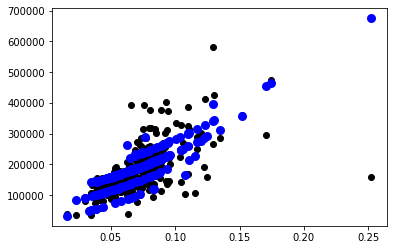

In [99]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], y_test, color="black")
plt.scatter(X_test[:,0], y_pred, color="blue", linewidth=3)

In [97]:
array = [120,2001,2]
lr.predict(scaler.transform([array]))

array([170796.6221201])

In [100]:
{
    'tam': 120,
    'ano': 2001,
    'garagem': 2
}

{'tam': 120, 'ano': 2001, 'garagem': 2}

In [104]:
pickle.dump(lr, open('lr.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))